In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import r2_score


In [2]:
params = {'legend.fontsize': 20,
        'figure.figsize': (10, 7.5),
        'axes.labelsize': 20,
        'xtick.labelsize': 15, 
        'ytick.labelsize': 15, }

plt.style.use('dark_background')

plt.rcParams.update(params)

In [3]:
data = pd.read_excel("CervejaData.xlsx").dropna()
data.head(5)


,Data,temp_media,temp_min,temp_max,precipitacao,final de semana,consumo_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


In [4]:
beer = data['consumo_litros'].values
temp = data['temp_media'].values


Text(0, 0.5, 'temp')

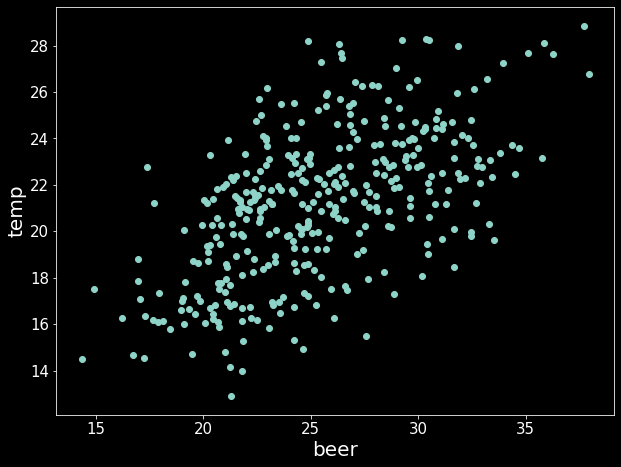

In [5]:
plt.figure()
plt.scatter(beer, temp)
plt.xlabel('beer')
plt.ylabel('temp')

Text(0, 0.5, 'beer')

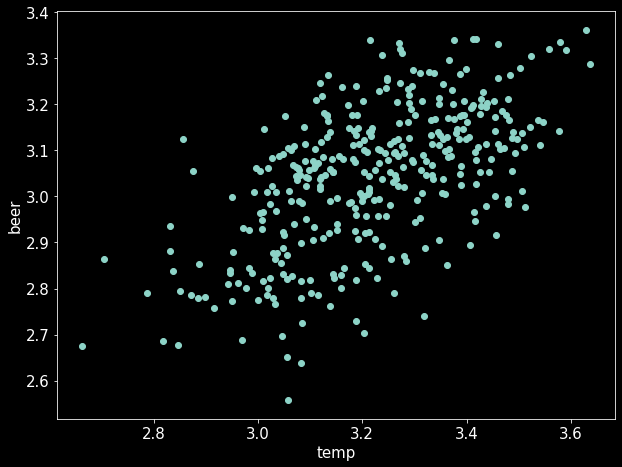

In [ ]:
plt.figure()
plt.scatter(np.log(beer), np.log(temp))
plt.xlabel('beer')
plt.ylabel('temp')

In [ ]:
t = np.log(beer)
ones = np.ones(len(t))
b = np.log(temp)
A = np.array([ones, t]).T 
AtA = A.T @ A 
Atb = A.T @ b
x_hat = np.linalg.solve(AtA, Atb)

In [ ]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1]*t
least_square_plot = x_hat [0] + x_hat[1] * t_linspace

In [ ]:
MSE = np.mean((least_square - b)**2)
print('MSE: ', MSE)

MSE:  0.015562685263782296


In [ ]:
r2 = r2_score(b, least_square)
print('R2 = ', r2)

R2 =  0.34287889769992674


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1,1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1,1))
least_square_sklearn = regr.predict(t.reshape(-1,1))

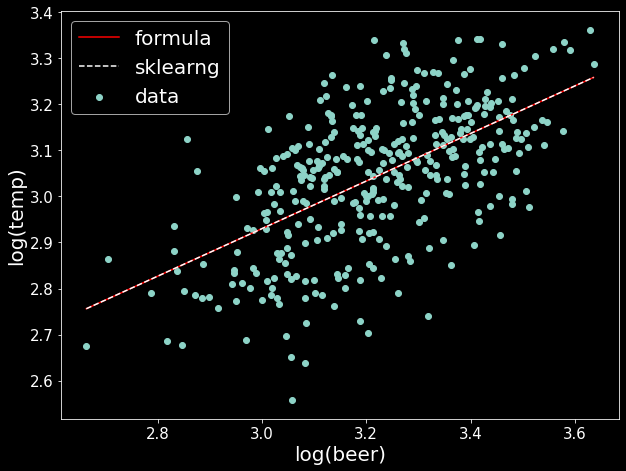

In [ ]:
fig, ax = plt.subplots()
plt.scatter(t,b, label='data')
plt.plot(t_linspace, least_square_plot, color='red', label='formula')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', color='white', label='sklearng')
plt.xlabel('log(beer)')
plt.ylabel('log(temp)')
plt.legend()